# Melt rate below 300m plots

For TYP vs COM comparison

### Also Melt rate/Thermal Driving/Friction Velocity different controllers in TYP experiments below

In [2]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm
from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

from matplotlib import gridspec

In [3]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


In [4]:
#12 model colours for 12 models, generated using https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']


#### Plot the COM and TYP experiments melt rate below 300m

In [6]:
sPerYr = 3600*24*365

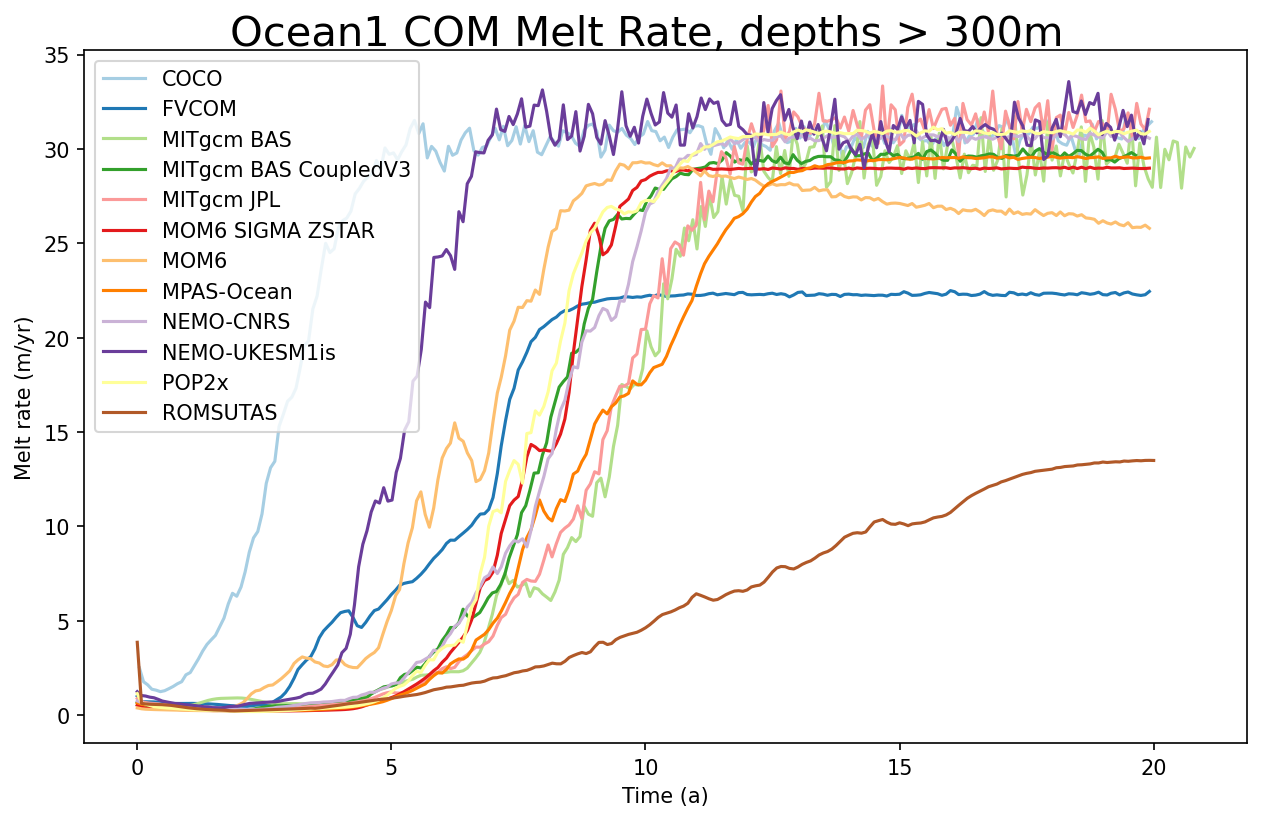

In [7]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
fig = plt.figure(figsize=(10, 6),facecolor='w',dpi = 150)
time = 12


for i in np.arange(length):
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate
    
    try:
        draft = ds.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = ds.iceDraft
    # mr < 1e36 is to get rid of fill values.
    mr = sPerYr * mr.where(mr < 1e36).where(mr !=0).where(np.abs(draft) > 300)
    time = ds.time
    
    plt.plot(time.values/sPerYr,mr.mean(['nx','ny']).values,
             color = modelcolours[i], label = labels[i])

plt.legend()
plt.ylabel('Melt rate (m/yr)')
plt.xlabel('Time (a)')

fig.suptitle('Ocean1 COM Melt Rate, depths > 300m', y = 0.92,fontsize=20);

In [8]:
modelcoloursTYP=['#1f78b4','#fdbf6f','#ff7f00','#cab2d6','#cab2d6','#6a3d9a','#ffff99','#b15928','#b15928']
modelstylesTYP = ['-','-','-','-','--','-','-','-','--']

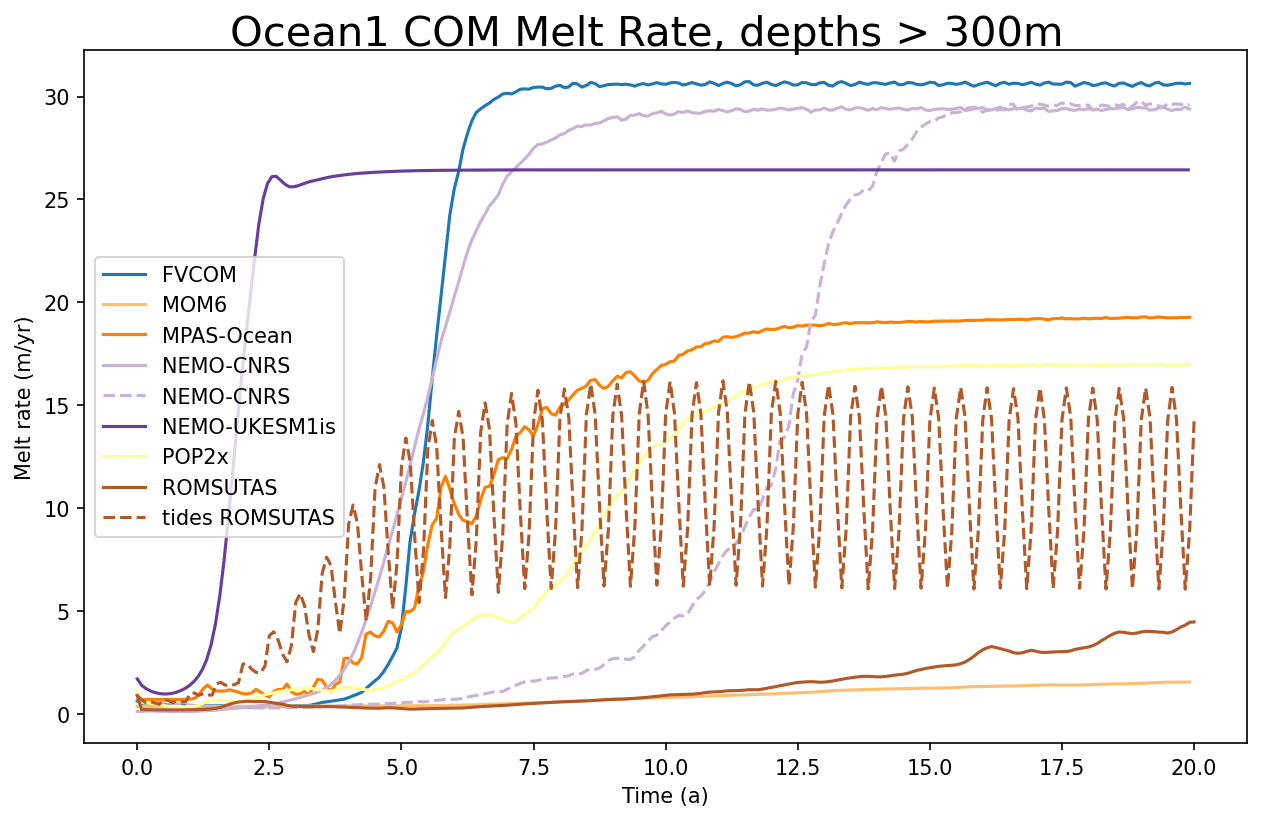

In [9]:
expt = Ocean1_TYP
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
fig = plt.figure(figsize=(10, 6),facecolor='w',dpi = 150)
time = 12


for i in np.arange(length):
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate
    
    try:
        draft = ds.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = ds.iceDraft
    # mr < 1e36 is to get rid of fill values.
    mr = sPerYr * mr.where(mr < 1e36).where(mr !=0).where(np.abs(draft) > 300)
    time = ds.time
    
    plt.plot(time.values/sPerYr,mr.mean(['nx','ny']).values,
             color = modelcoloursTYP[i], label = labels[i], linestyle = modelstylesTYP[i])

plt.legend()
plt.ylabel('Melt rate (m/yr)')
plt.xlabel('Time (a)')

fig.suptitle('Ocean1 COM Melt Rate, depths > 300m', y = 0.92,fontsize=20);

#### Now put everything together in one plot:

with colours matching

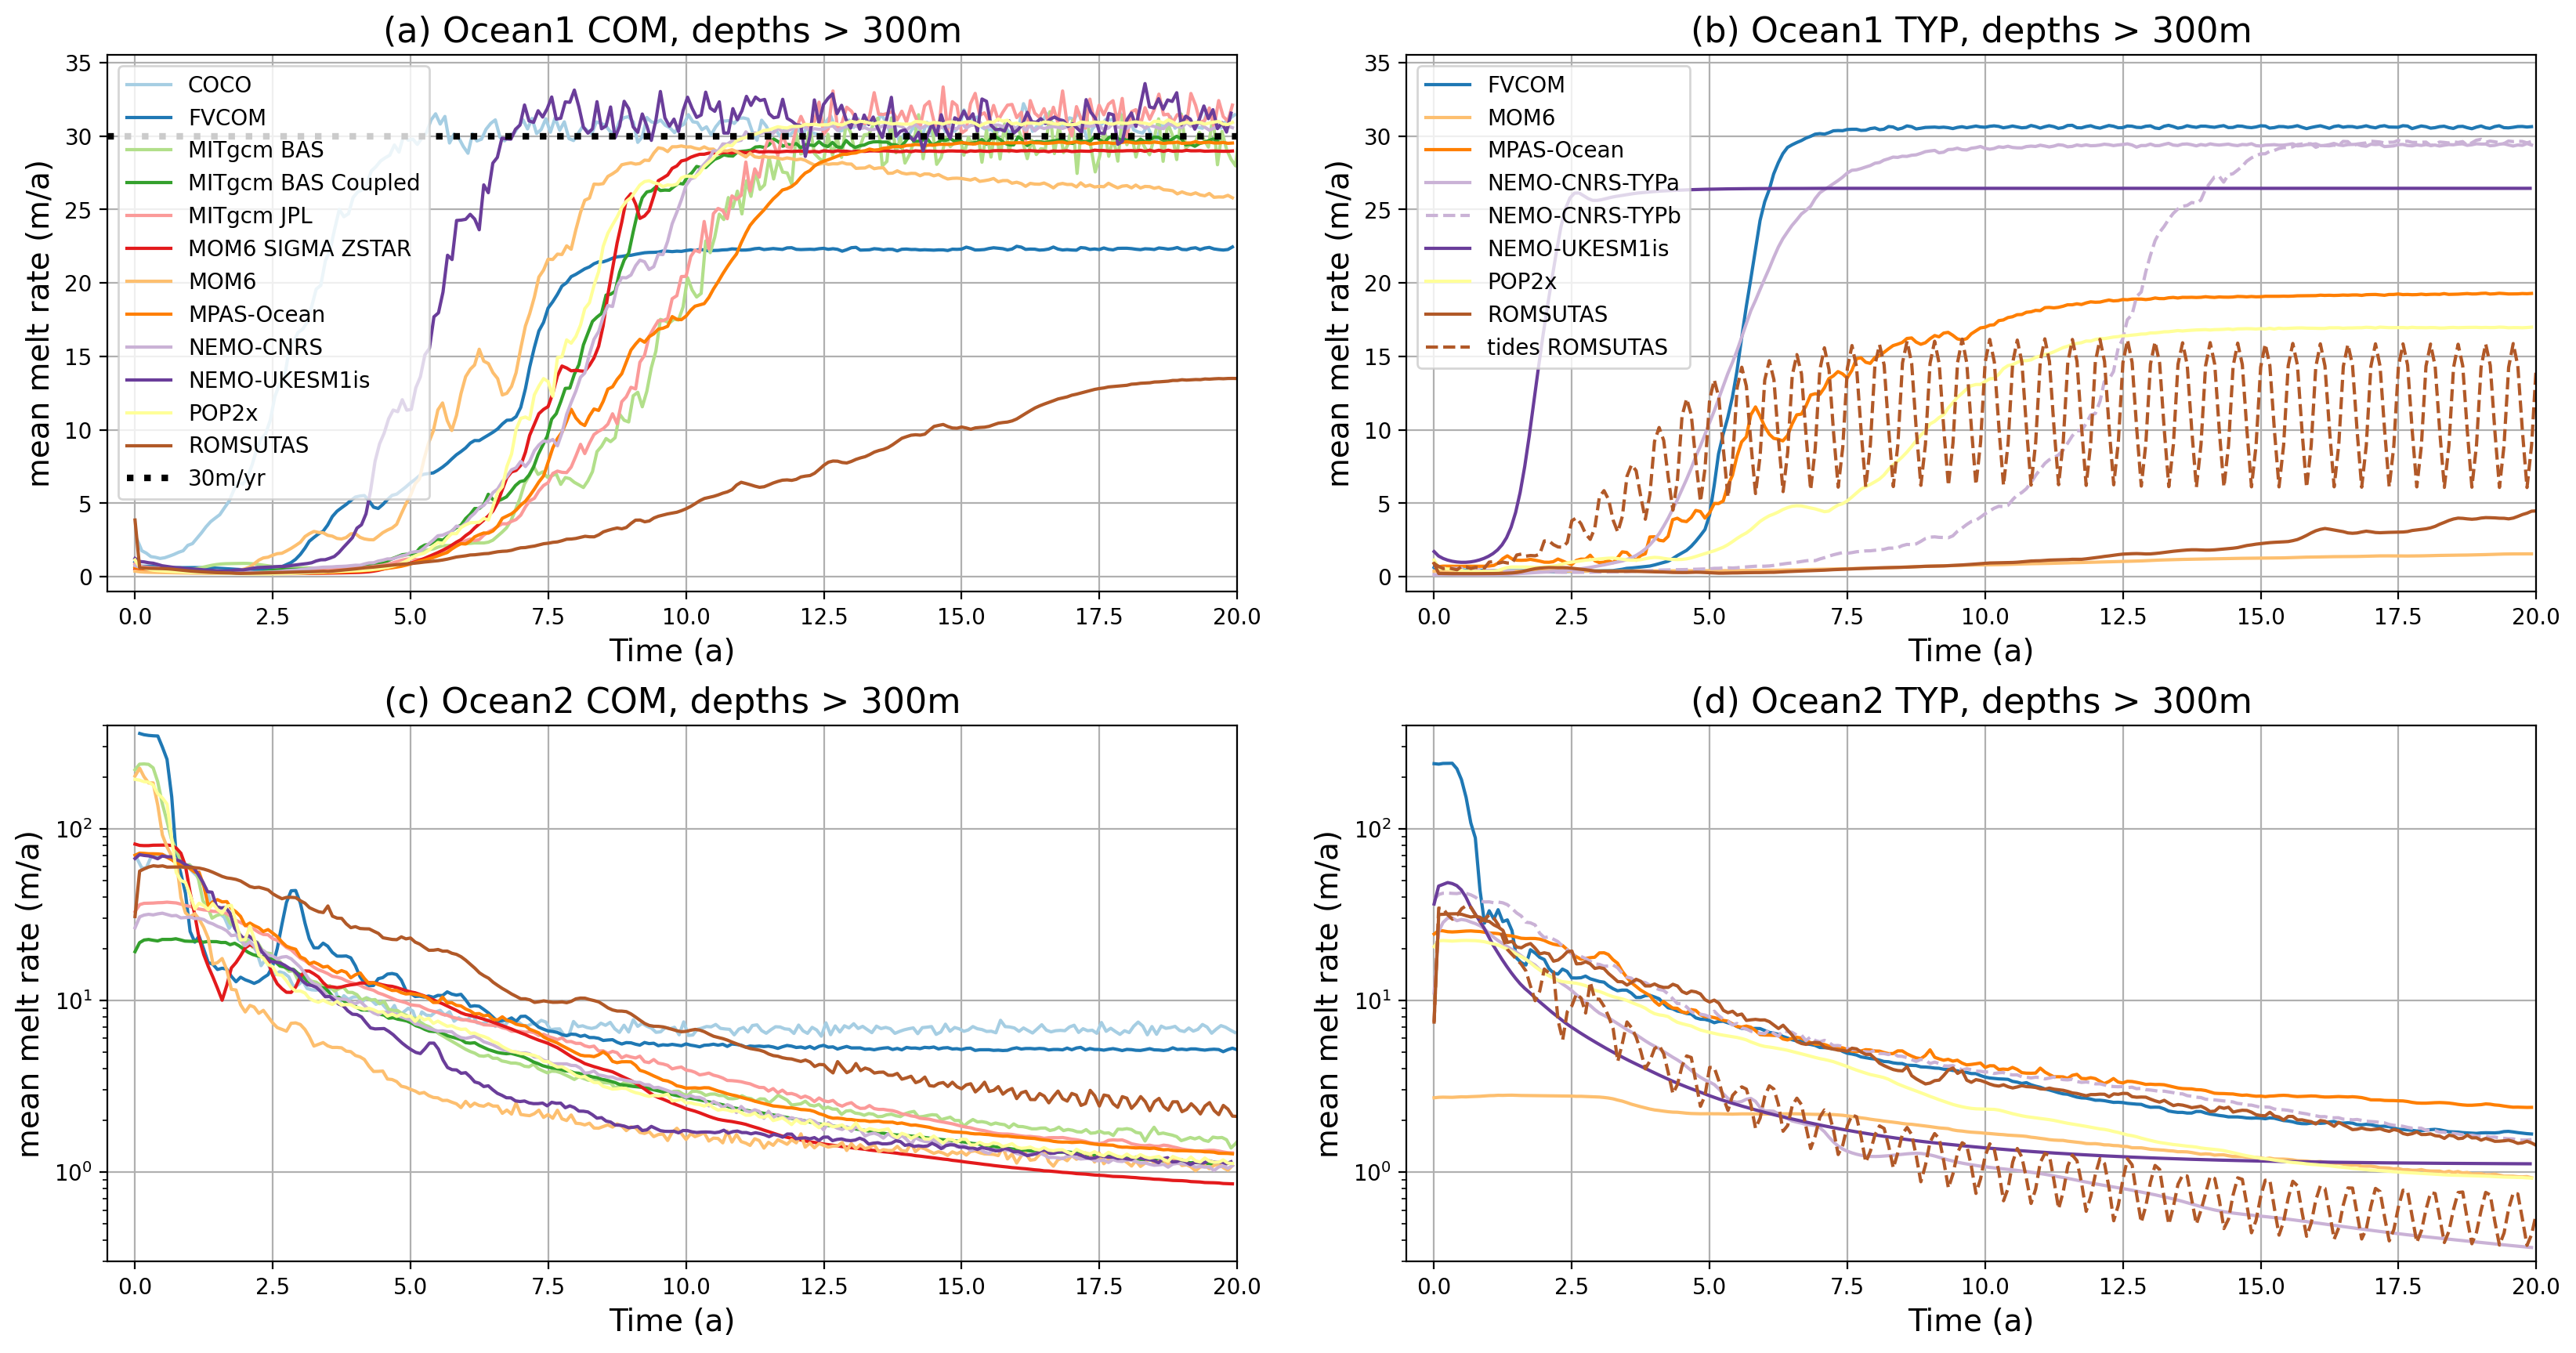

In [10]:
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
fig = plt.figure(figsize = (20,10),facecolor='w',dpi = 200)


for k in np.arange(4):
    expt = [Ocean1_COM,Ocean1_TYP,Ocean2_COM,Ocean2_TYP][k]
    plt.subplot(2,2,k+1)
    title = ['(a) Ocean1 COM, depths > 300m','(b) Ocean1 TYP, depths > 300m',
             '(c) Ocean2 COM, depths > 300m',
             '(d) Ocean2 TYP, depths > 300m'][k]

    ## OCEAN1 COM
    labels = []
    for fileIndex in range(len(expt)):
        fileName = expt[fileIndex]
        baseName = os.path.basename(basedrive +fileName)
        modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
        labels.append(modelName)
    length = len(expt)
    if (k==1 or k==3):
        labels[3]='NEMO-CNRS-TYPa'
        labels[4]='NEMO-CNRS-TYPb'
    else:
        labels[3]='MITgcm BAS Coupled'
        
    
    
    for i in np.arange(length):
        ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
        # make x and y coordinates
        ds = ds.set_coords(['x', 'y', 'time'])
        nTime = ds.sizes['nTime']
        mr = ds.meltRate
        
        try:
            draft = ds.iceDraft.isel(nTime = 0)
        except ValueError:
            draft = ds.iceDraft
        # mr < 1e36 is to get rid of fill values.
        mr = sPerYr * mr.where(mr < 1e36).where(mr !=0).where(np.abs(draft) > 300)
        time = ds.time
        if (k==0 or k==2):
            plt.plot(time.values/sPerYr,mr.mean(['nx','ny']).values,
                     color = modelcolours[i], label = labels[i])
        else: # plot TYP colours
            plt.plot(time.values/sPerYr,mr.mean(['nx','ny']).values,
                     color = modelcoloursTYP[i], label = labels[i], linestyle = modelstylesTYP[i])
    
    
    plt.ylabel('mean melt rate (m/a)', fontsize = 14)
    plt.xlabel('Time (a)', fontsize = 14)
    plt.xlim(-0.5,20)
    # add 30m line for Ocean1
    if k==0:
        plt.hlines([30],-0.5,20,color ='k', linestyle = 'dotted',linewidth = 3,label = '30m/yr')

    if (k==0 or k==1):
        plt.ylim(-1,35.5)
        plt.legend()
    else:
        plt.ylim(0.3,400)
        plt.yscale('log')


    plt.grid()
    plt.title(title, fontsize=16);

fig.subplots_adjust(hspace = 0.25, wspace = 0.15)



# Plot TYP u* and T* statistics

### Violin plots like the COM experiments

In [11]:
from matplotlib import gridspec

Text(0.5, 1.0, 'Ocean2 TYP - Year 20')

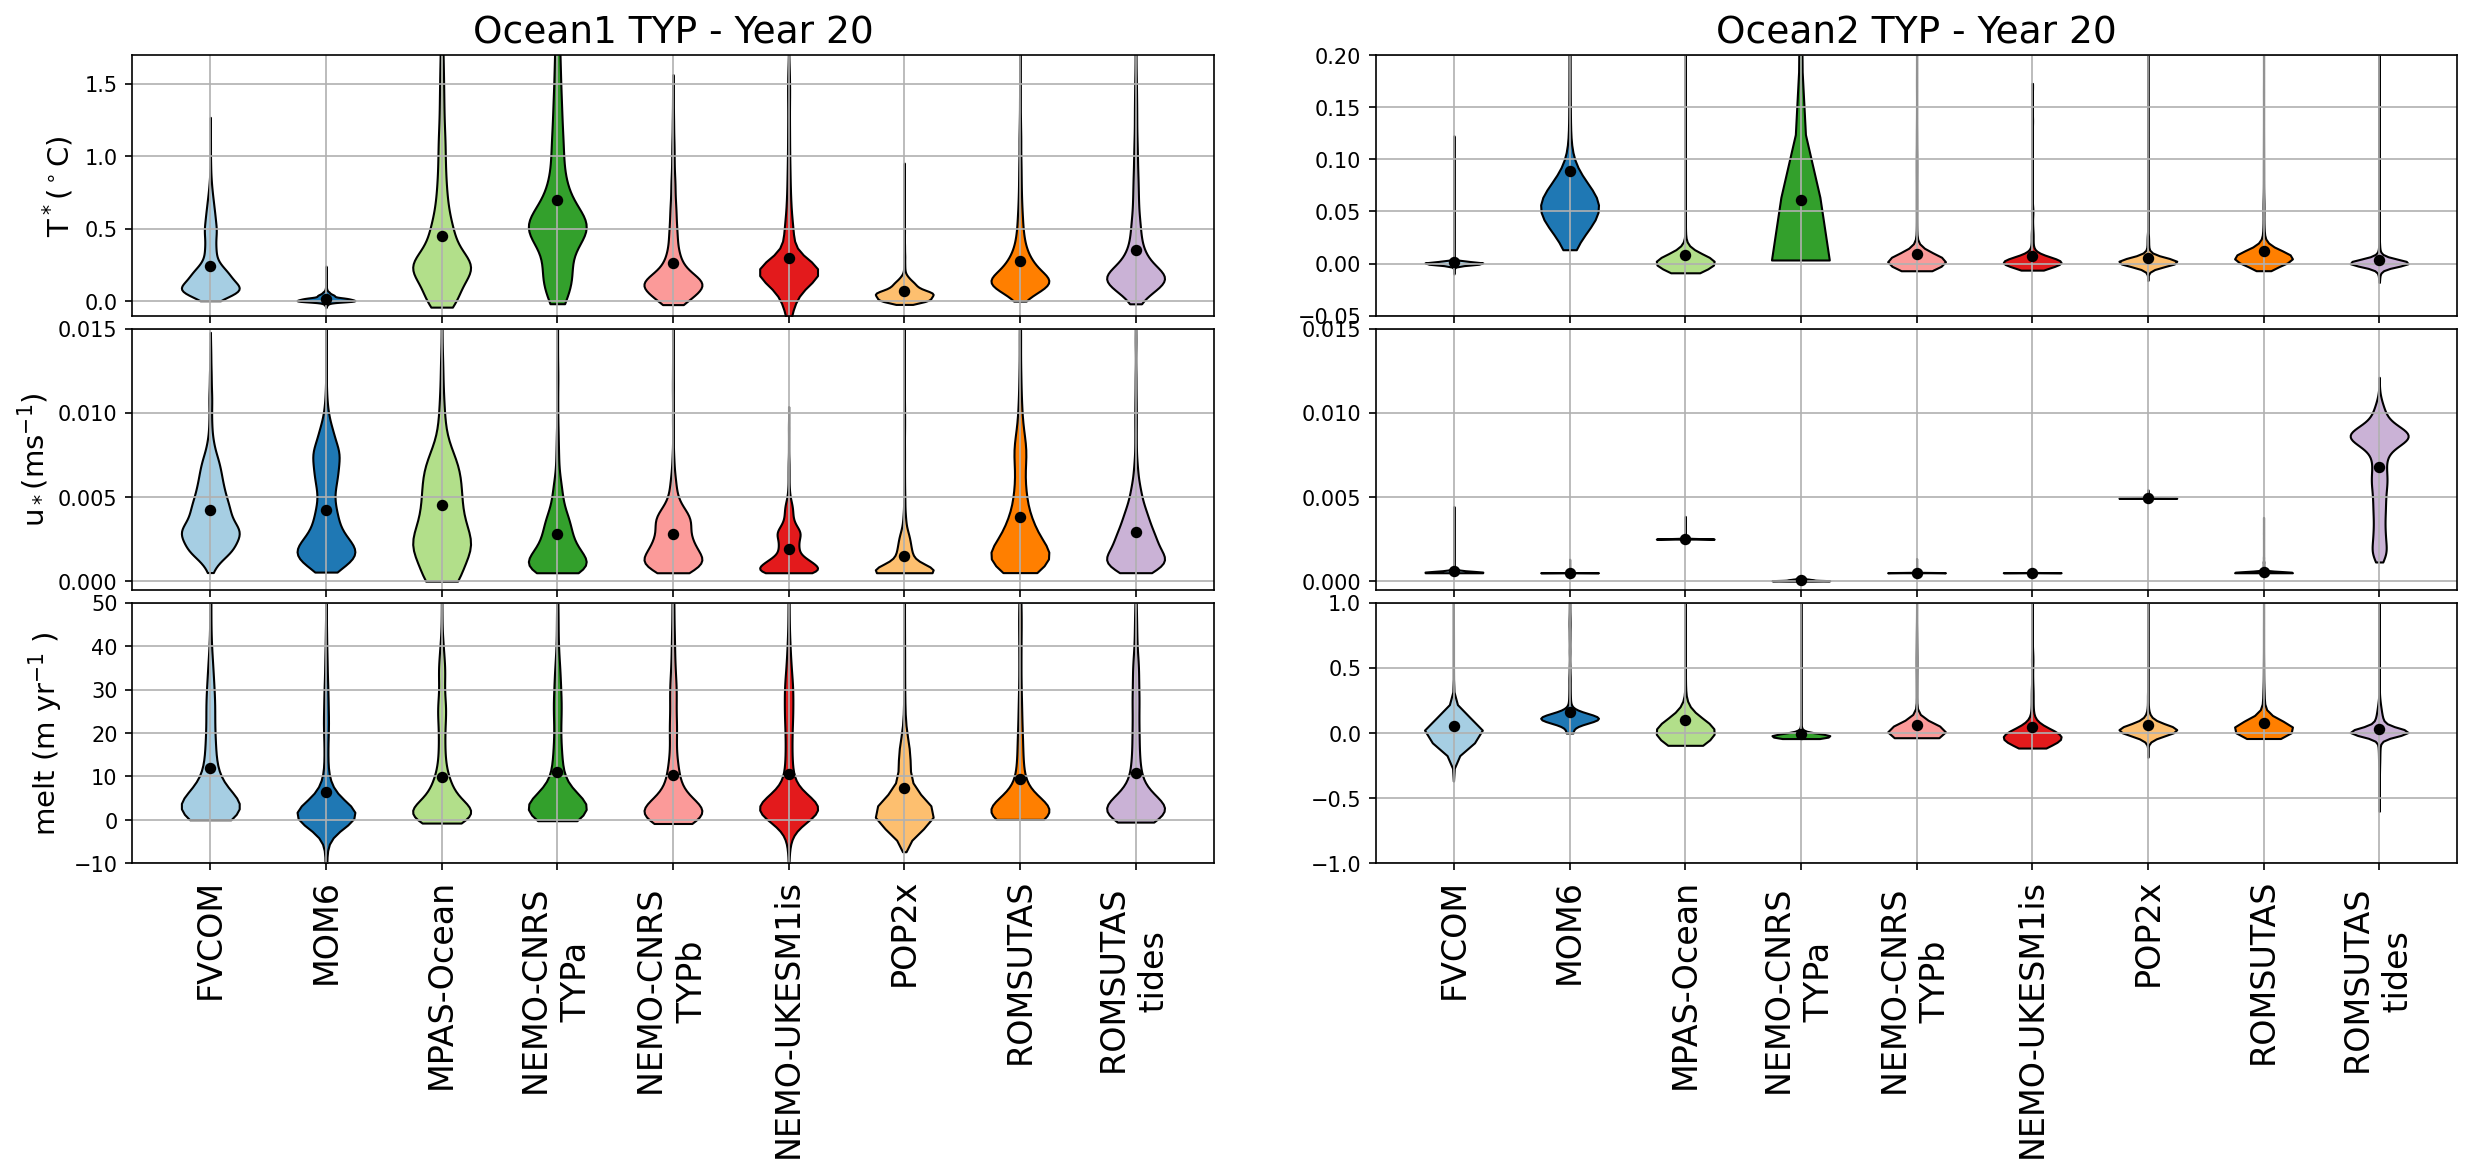

In [12]:
# box plot of  T^*, u^* and melt for Ocean1_COM
expt = Ocean1_TYP
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

labels2 = [
 'FVCOM',
 'MOM6',
 'MPAS-Ocean',
 'NEMO-CNRS \n TYPa',
 'NEMO-CNRS \n TYPb',
 'NEMO-UKESM1is',
 'POP2x',
 'ROMSUTAS',
 'ROMSUTAS \n tides']


gs = gridspec.GridSpec(nrows=3,ncols=2,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(20,7),facecolor='w',dpi = 150)

ax=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[2,0])

ax4=fig.add_subplot(gs[0,1])
ax5=fig.add_subplot(gs[1,1])
ax6=fig.add_subplot(gs[2,1])


datats = []
dataus = []
datams = []

expt = Ocean1_COM

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))#.mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))#.mean(['nx','ny'])
    # melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    #ax.scatter(ustar_av, tstar_av,s=5,color=modelcolours[i],label=labels[i])
    ts = np.ravel(tstar_av.values)[np.ravel(tstar_av.values)<1e36]
    us = np.ravel(ustar_av.values)[np.ravel(ustar_av.values)<1e36]
    ms = np.ravel(melt.values)[np.ravel(melt.values)<1e36]*365*24*60*60
    datats.append(ts)
    dataus.append(us)
    datams.append(ms)
    
parts = ax.violinplot(datats,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax.scatter(i+1, np.mean(datats[i]),color = 'k', zorder = 3, s = 20)
    
parts = ax2.violinplot(dataus,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax2.scatter(i+1, np.mean(dataus[i]),color = 'k', zorder = 3, s = 20)
    
parts = ax3.violinplot(datams,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax3.scatter(i+1, np.mean(datams[i]),color = 'k', zorder = 3, s = 20)


#ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
#ax.legend(loc='lower right',frameon=False,handletextpad=0.01)
ax.set_xticks(np.arange(1,10))
ax2.set_xticks(np.arange(1,10))
ax3.set_xticks(np.arange(1,10))

ax3.set_xticklabels(labels2, rotation = 90, fontsize = 16);
ax.set_xticklabels('');
ax2.set_xticklabels('');

ax.set_ylim(-0.1,1.7)
ax2.set_ylim(-0.0005,0.015)
ax3.set_ylim(-10,50)

ax.grid()
ax2.grid()
ax3.grid()

ax.set_ylabel(r'$\mathrm{T^* (^\circ C )}$',fontsize=14)
ax2.set_ylabel(r'$\mathrm{u_* (ms^{-1} )}$',fontsize=14)
ax3.set_ylabel('melt (m yr$^{-1}$ )',fontsize=14)

datats = []
dataus = []
datams = []

expt = Ocean2_TYP

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    melt_av = (melt.where(melt<1e36))
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36))#.mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36))#.mean(['nx','ny'])
    # melt_div_constants = melt_av*rho_fw*L/(rho_sw*GammaT[labels[i]]*Cw)
    #ax.scatter(ustar_av, tstar_av,s=5,color=modelcolours[i],label=labels[i])
    ts = np.ravel(tstar_av.values)[np.ravel(tstar_av.values)<1e36]
    us = np.ravel(ustar_av.values)[np.ravel(ustar_av.values)<1e36]
    ms = np.ravel(melt.values)[np.ravel(melt.values)<1e36]*365*24*60*60
    datats.append(ts)
    dataus.append(us)
    datams.append(ms)
    
parts = ax4.violinplot(datats,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax4.scatter(i+1, np.mean(datats[i]),color = 'k', zorder = 3, s = 20)
    
parts = ax5.violinplot(dataus,showmedians=False,
        showextrema=False);
for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax5.scatter(i+1, np.mean(dataus[i]),color = 'k', zorder = 3, s = 20)
    
parts = ax6.violinplot(datams,showmedians=False,
        showextrema=False);

for i in range(len(parts['bodies'])):
    pc = parts['bodies'][i]
    pc.set_facecolor(modelcolours[i])
    pc.set_edgecolor('black')    
    pc.set_alpha(1)
    ax6.scatter(i+1, np.mean(datams[i]),color = 'k', zorder = 3, s = 20)


#ax.plot((0,0.02),(0,.02),'k--')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),frameon=False,ncol=length/2,handletextpad=0.01)
#ax.legend(loc='lower right',frameon=False,handletextpad=0.01)
ax4.set_xticks(np.arange(1,10))
ax5.set_xticks(np.arange(1,10))
ax6.set_xticks(np.arange(1,10))

ax6.set_xticklabels(labels2, rotation = 90, fontsize = 16);
ax5.set_xticklabels('');
ax4.set_xticklabels('');

ax4.set_ylim(-0.05,0.2)
ax5.set_ylim(-0.0005,0.015)
ax6.set_ylim(-1,1)

ax4.grid()
ax5.grid()
ax6.grid()

ax.set_title('Ocean1 TYP - Year 20', fontsize = 18)
ax4.set_title('Ocean2 TYP - Year 20', fontsize = 18)



### Just plotting the mean values to simplify it a bit

Text(0, 0.5, 'Mean friction velocity (ms$^{-1}$)')

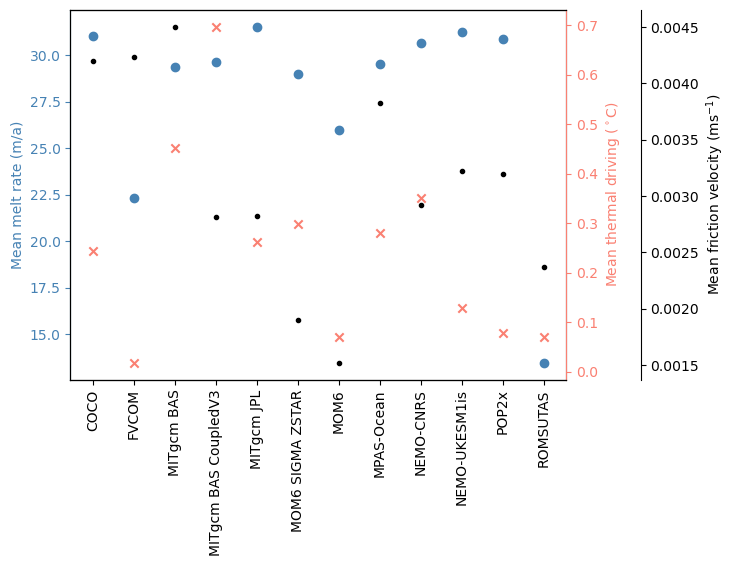

In [17]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

fig,ax = plt.subplots()
for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

plt.scatter(np.arange(length),ms,color = 'steelblue')

ax2 = ax.twinx()
ax2.scatter(np.arange(length),ts,color = 'salmon',marker = 'x')
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.15))
ax3.scatter(np.arange(length),us,color = 'k', marker = '.')

ax.set_xticks(np.arange(length))
ax.set_xticklabels(labels, rotation = 90)

ax.spines['left'].set_color('steelblue')
ax.tick_params(axis='y', colors='steelblue')

ax2.spines['right'].set_color('salmon')
ax2.tick_params(axis='y', colors='salmon')

ax3.spines['right'].set_color('k')
ax3.tick_params(axis='y', colors='k')

ax.set_ylabel('Mean melt rate (m/a)',color = 'steelblue')
ax2.set_ylabel('Mean thermal driving ($^\circ$C)',color = 'salmon')
ax3.set_ylabel('Mean friction velocity (ms$^{-1}$)')


Text(0, 0.5, 'Mean friction velocity (ms$^{-1}$)')

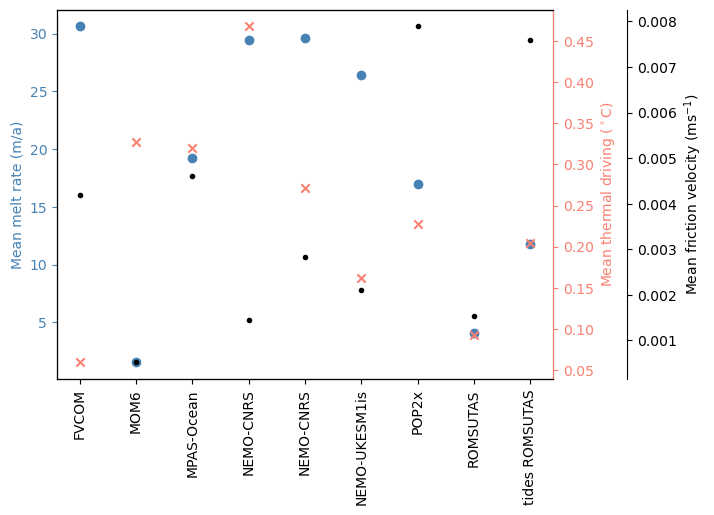

In [18]:
expt = Ocean1_TYP
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

fig,ax = plt.subplots()
for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

plt.scatter(np.arange(length),ms,color = 'steelblue')

ax2 = ax.twinx()
ax2.scatter(np.arange(length),ts,color = 'salmon',marker = 'x')
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.15))

ax3.scatter(np.arange(length),us,color = 'k', marker = '.')

ax.set_xticks(np.arange(length))
ax.set_xticklabels(labels, rotation = 90)

ax.spines['left'].set_color('steelblue')
ax.tick_params(axis='y', colors='steelblue')

ax2.spines['right'].set_color('salmon')
ax2.tick_params(axis='y', colors='salmon')

ax3.spines['right'].set_color('k')
ax3.tick_params(axis='y', colors='k')

ax.set_ylabel('Mean melt rate (m/a)',color = 'steelblue')
ax2.set_ylabel('Mean thermal driving ($^\circ$C)',color = 'salmon')
ax3.set_ylabel('Mean friction velocity (ms$^{-1}$)')


### Put COM adn TYP together

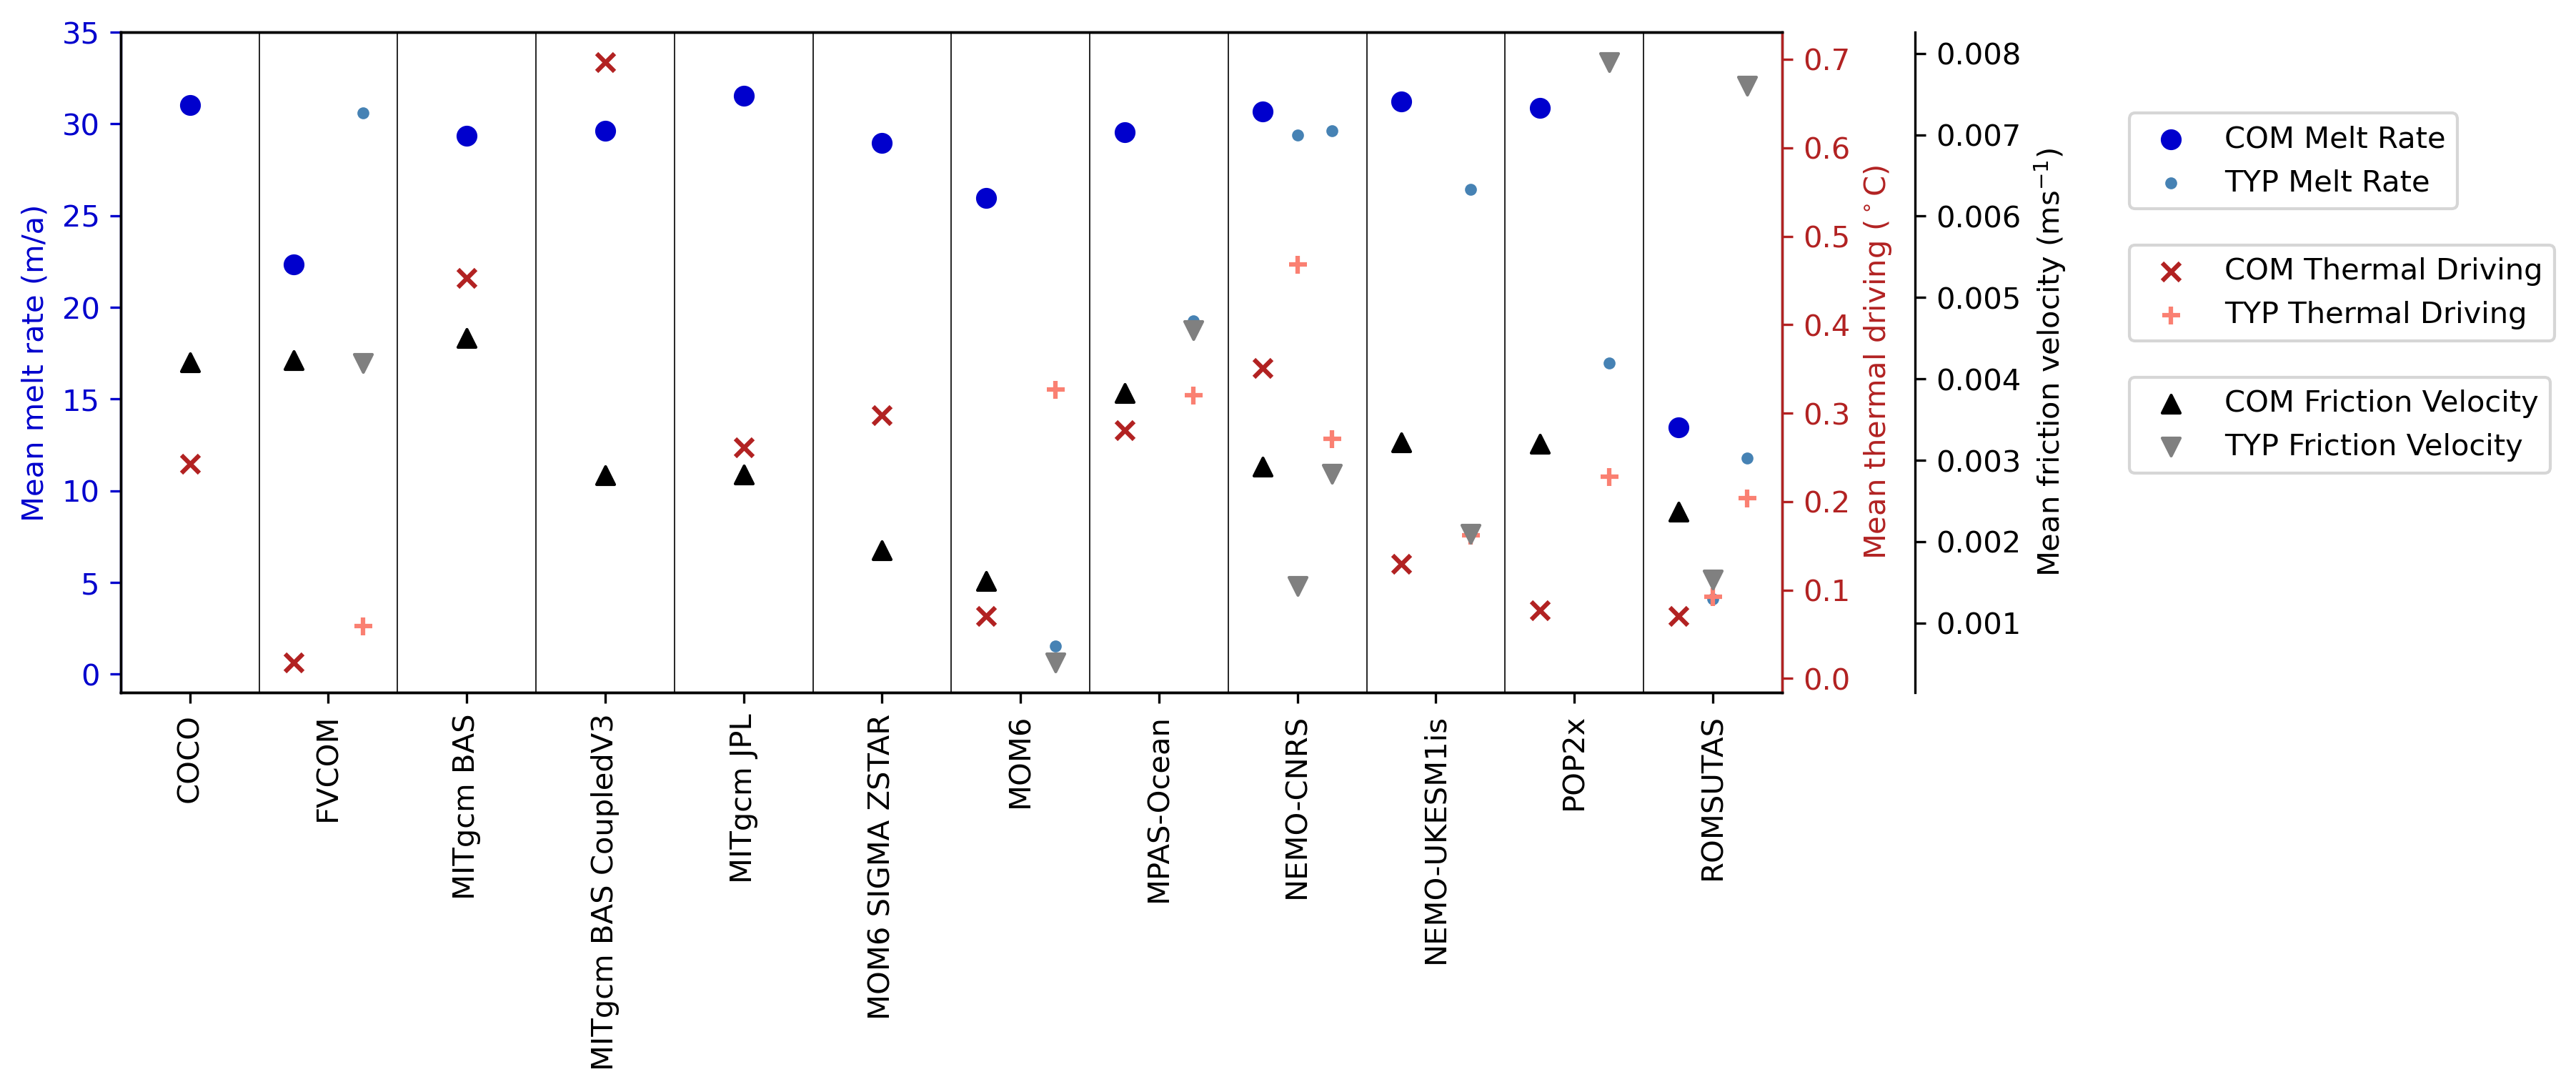

In [78]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

fig,ax = plt.subplots(figsize = (10,4),dpi = 300)
for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

CS1 = plt.scatter([0,0.75,2,3,4,5,5.75,6.75,7.75,8.75,9.75,10.75],ms,color = 'mediumblue', label = 'COM Melt Rate')

ax2 = ax.twinx()
CS2= ax2.scatter([0,0.75,2,3,4,5,5.75,6.75,7.75,8.75,9.75,10.75],ts,color = 'firebrick',marker = 'x', label = 'COM Thermal Driving')
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.08))
CS3 = ax3.scatter([0,0.75,2,3,4,5,5.75,6.75,7.75,8.75,9.75,10.75],us,color = 'k', marker = '^',label = 'COM Friction Velocity')

ax.set_xticks(np.arange(length))
ax.set_xticklabels(labels, rotation = 90)

ax.spines['left'].set_color('mediumblue')
ax.tick_params(axis='y', colors='mediumblue')

ax2.spines['right'].set_color('firebrick')
ax2.tick_params(axis='y', colors='firebrick')

ax3.spines['right'].set_color('k')
ax3.tick_params(axis='y', colors='k')

ax.set_ylabel('Mean melt rate (m/a)',color = 'mediumblue')
ax2.set_ylabel('Mean thermal driving ($^\circ$C)',color = 'firebrick')
ax3.set_ylabel('Mean friction velocity (ms$^{-1}$)')


#####

expt = Ocean1_TYP
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

CS4 = ax.scatter([1.25,6.25,7.25,8,8.25,9.25,10.25,11,11.25],ms,color = 'steelblue',marker = '.', label = 'TYP Melt Rate')
CS5 = ax2.scatter([1.25,6.25,7.25,8,8.25,9.25,10.25,11,11.25],ts,color = 'salmon',marker = '+', label = 'TYP Thermal Driving')
CS6 = ax3.scatter([1.25,6.25,7.25,8,8.25,9.25,10.25,11,11.25],us,color = 'grey', marker = 'v', label = 'TYP Friction Velocity')

ax.vlines(np.arange(12)+0.5,-1,35,color = 'k', linewidth = 0.4)
ax.set_ylim(-1,35)
ax.set_xlim(-0.5,11.5)

ax.legend(loc = 'upper left', bbox_to_anchor = (1.2,0.9))
ax2.legend(loc = 'upper left', bbox_to_anchor = (1.2,0.7))
ax3.legend(loc = 'upper left', bbox_to_anchor = (1.2,0.5))



### Just do experiments with a TYP analogue

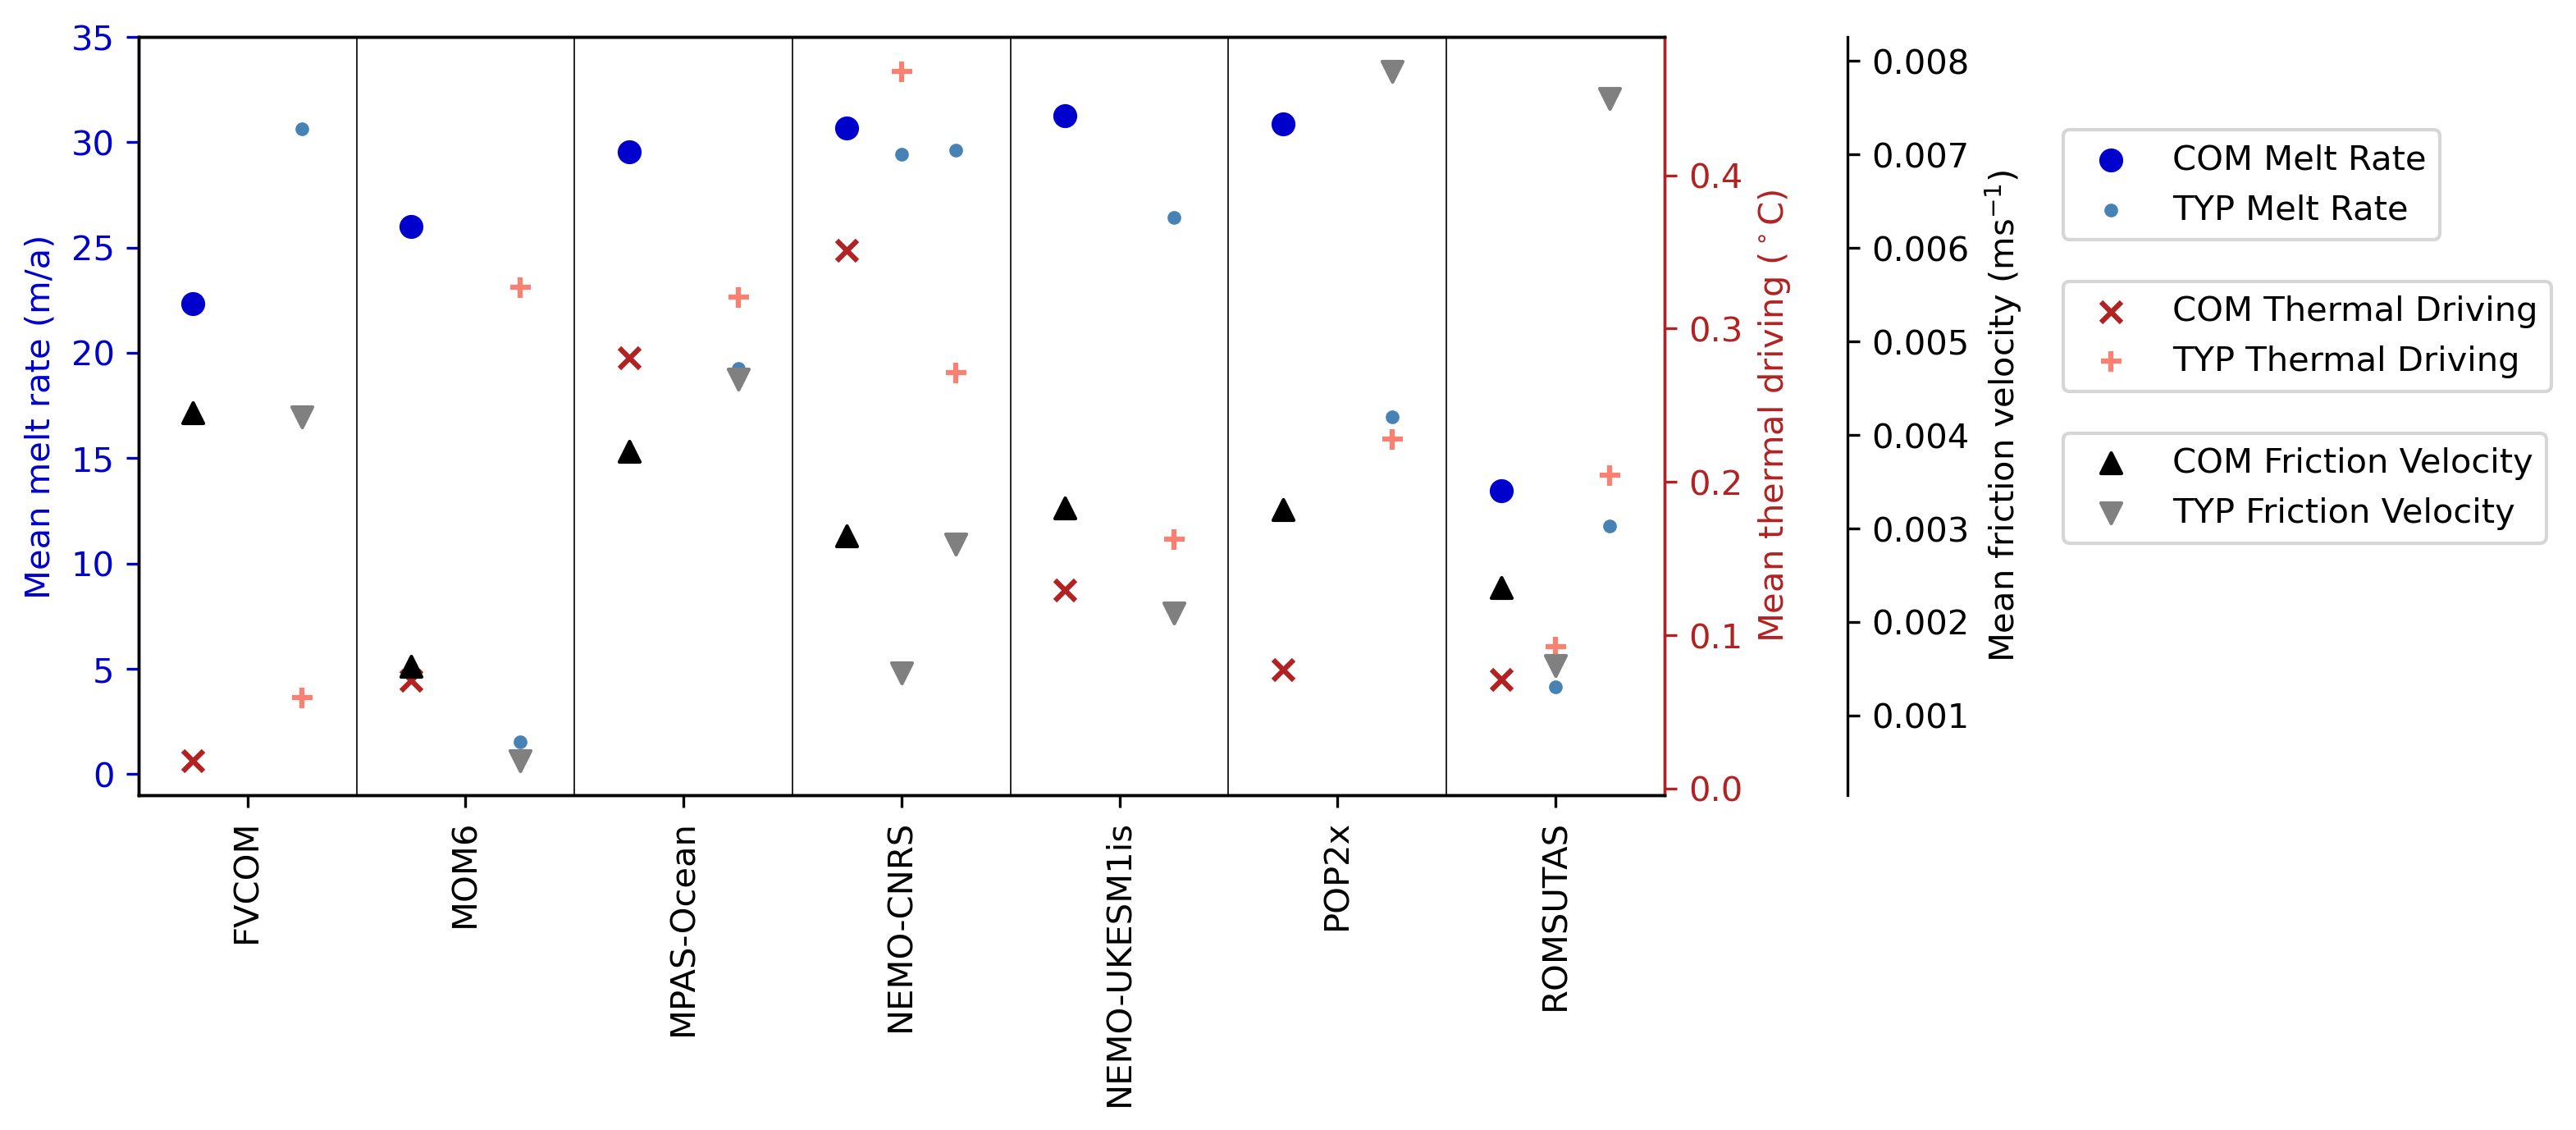

In [85]:
expt = np.take(Ocean1_COM,[1,6,7,8,9,10,11]) #pick out only COM experiments with TYPs
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

fig,ax = plt.subplots(figsize = (8,4),dpi = 300)
for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

CS1 = plt.scatter(np.arange(7)-0.25,ms,color = 'mediumblue', label = 'COM Melt Rate')

ax2 = ax.twinx()
CS2= ax2.scatter(np.arange(7)-0.25,ts,color = 'firebrick',marker = 'x', label = 'COM Thermal Driving')
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.12))
CS3 = ax3.scatter(np.arange(7)-0.25,us,color = 'k', marker = '^',label = 'COM Friction Velocity')

ax.set_xticks(np.arange(length))
ax.set_xticklabels(labels, rotation = 90)

ax.spines['left'].set_color('mediumblue')
ax.tick_params(axis='y', colors='mediumblue')

ax2.spines['right'].set_color('firebrick')
ax2.tick_params(axis='y', colors='firebrick')

ax3.spines['right'].set_color('k')
ax3.tick_params(axis='y', colors='k')

ax.set_ylabel('Mean melt rate (m/a)',color = 'mediumblue')
ax2.set_ylabel('Mean thermal driving ($^\circ$C)',color = 'firebrick')
ax3.set_ylabel('Mean friction velocity (ms$^{-1}$)')


#####

expt = Ocean1_TYP
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

CS4 = ax.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],ms,color = 'steelblue',marker = '.', label = 'TYP Melt Rate')
CS5 = ax2.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],ts,color = 'salmon',marker = '+', label = 'TYP Thermal Driving')
CS6 = ax3.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],us,color = 'grey', marker = 'v', label = 'TYP Friction Velocity')

ax.vlines(np.arange(7)+0.5,-1,35,color = 'k', linewidth = 0.4)
ax.set_ylim(-1,35)
ax.set_xlim(-0.5,6.5)

ax.legend(loc = 'upper left', bbox_to_anchor = (1.25,0.9))
ax2.legend(loc = 'upper left', bbox_to_anchor = (1.25,0.7))
ax3.legend(loc = 'upper left', bbox_to_anchor = (1.25,0.5))



### Add Ocean1 and Ocean2 in the same plot

Text(6.25, -0.6, 'TYP tides')

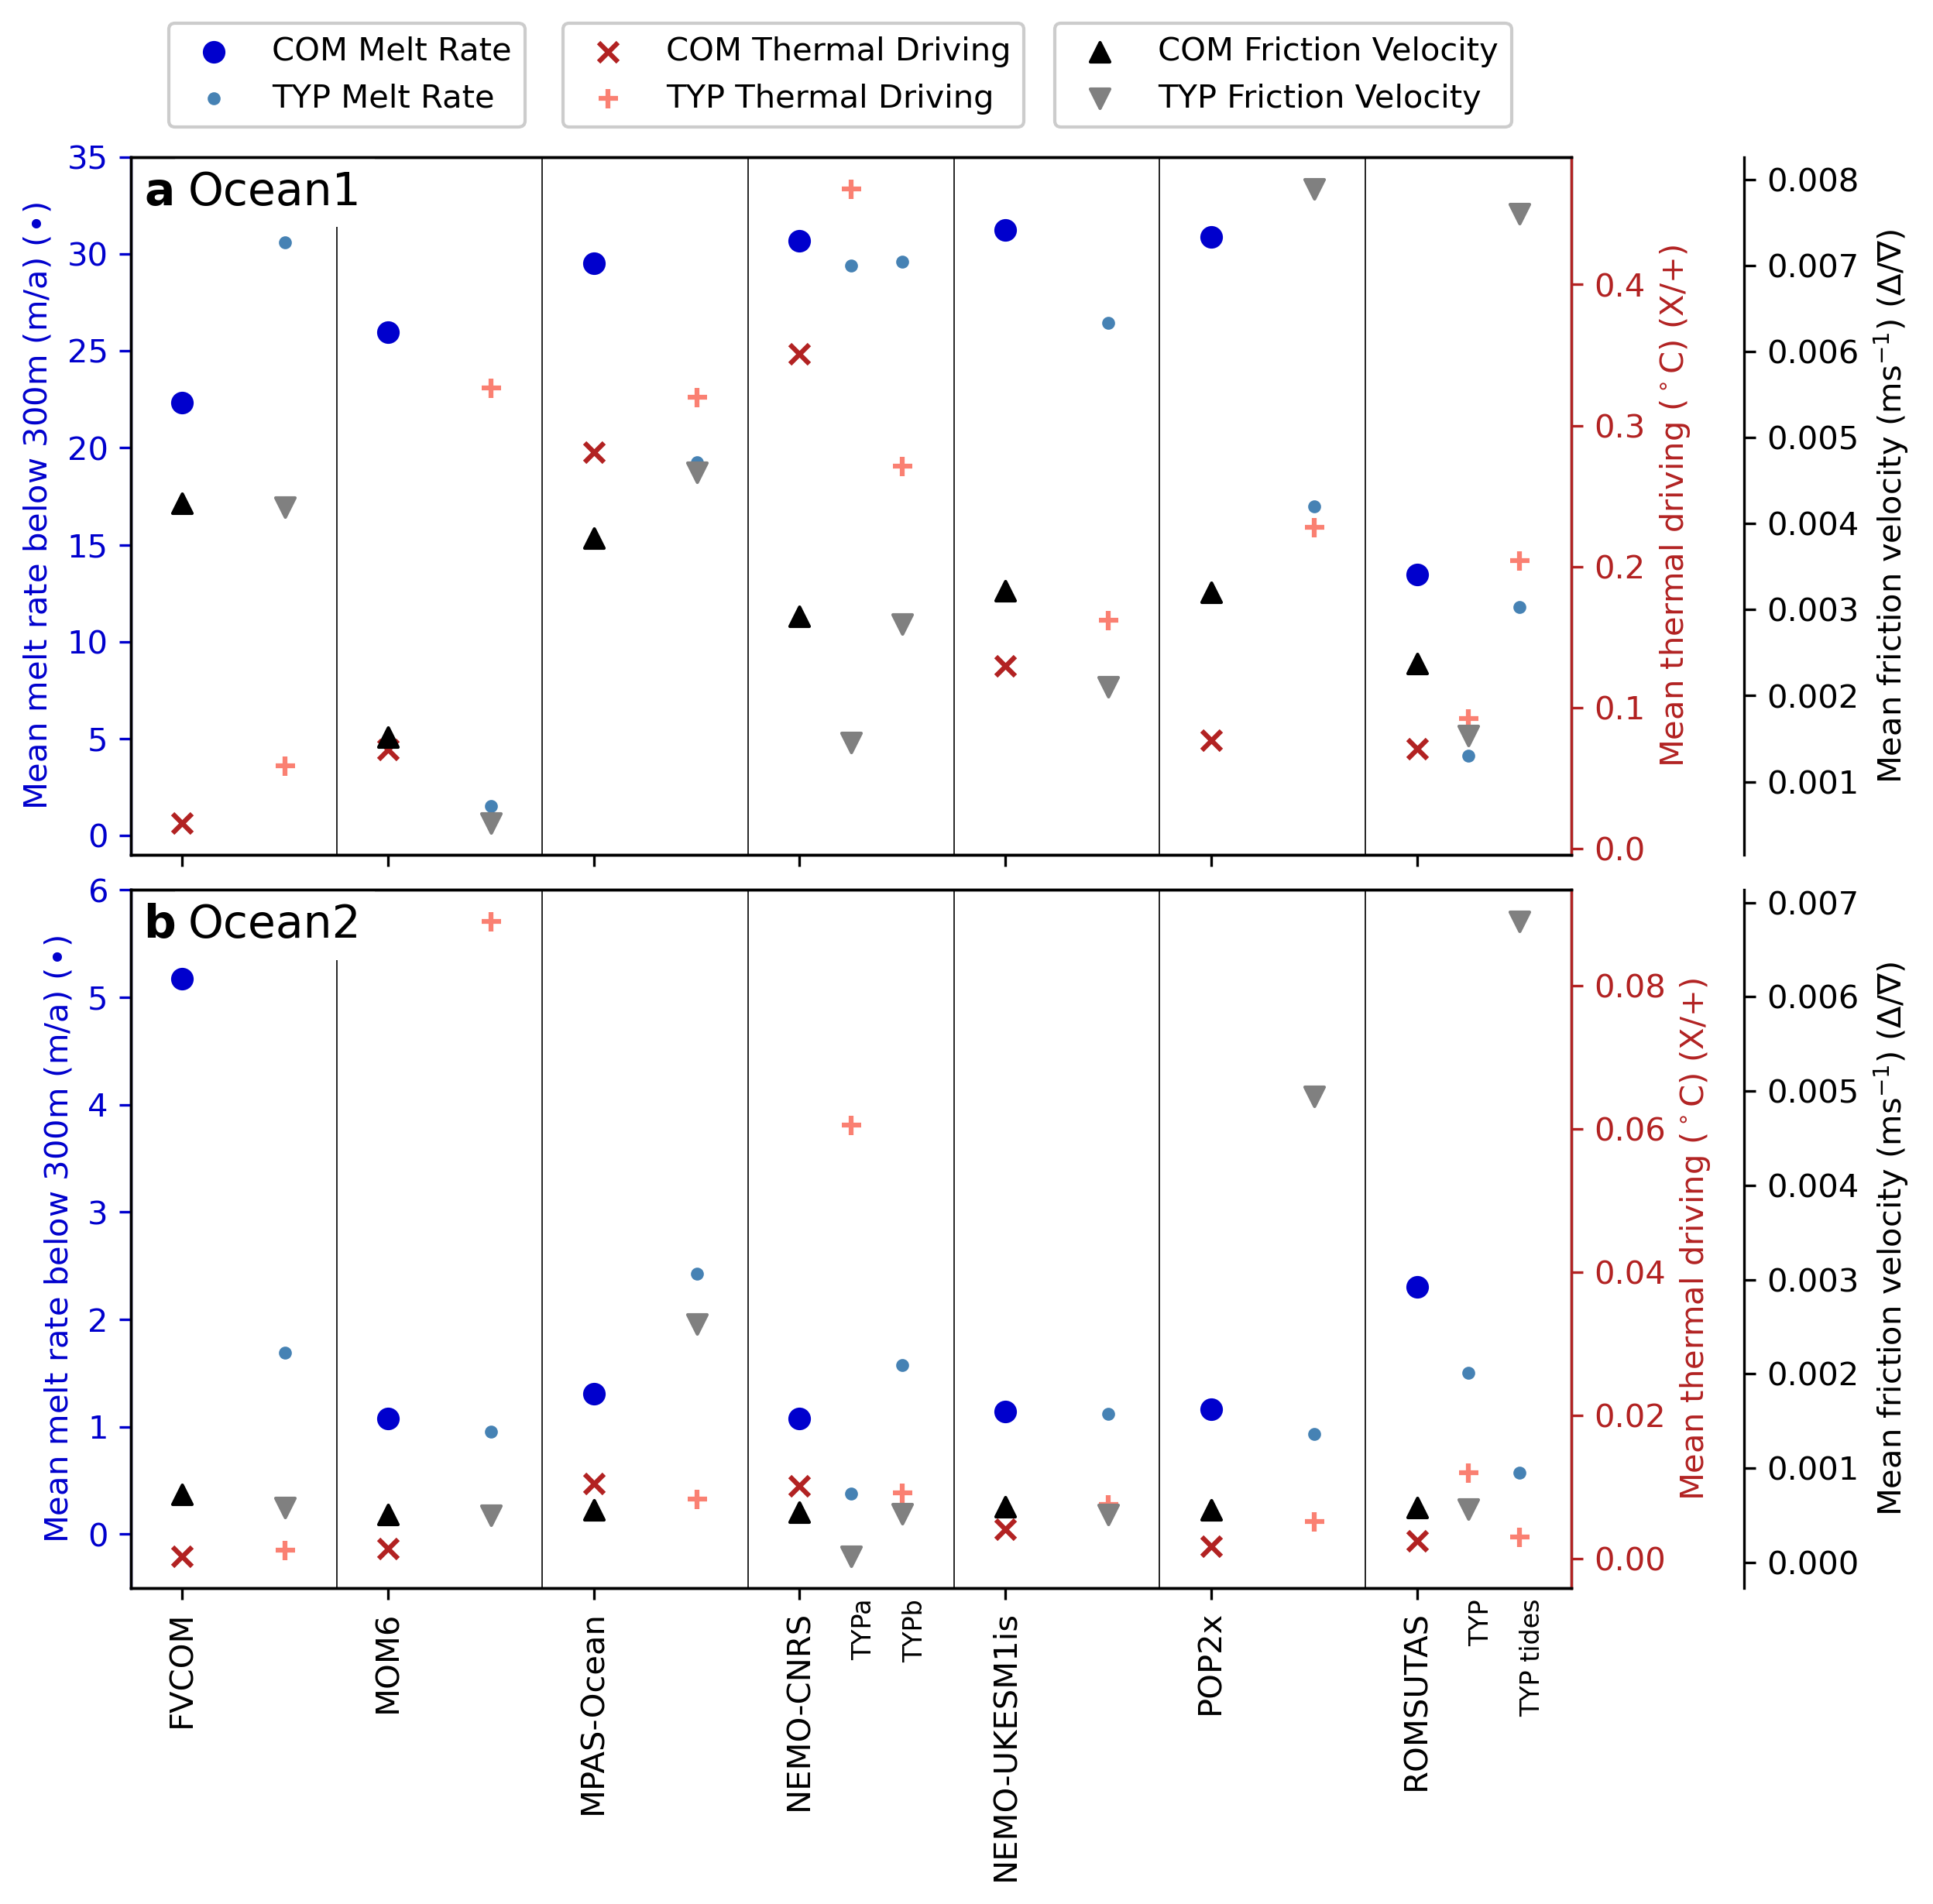

In [128]:
#create figure

gs = gridspec.GridSpec(nrows=2,ncols=1,wspace=0.15, hspace=0.05)
fig = plt.figure(figsize=(8,8),facecolor='w',dpi = 300)

ax=fig.add_subplot(gs[0])
ax4=fig.add_subplot(gs[1])

### Ocean1 first

expt = np.take(Ocean1_COM,[1,6,7,8,9,10,11]) #pick out only COM experiments with TYPs
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

# plot mr scatter
CS1 = ax.scatter(np.arange(7)-0.25,ms,color = 'mediumblue', label = 'COM Melt Rate')

# make new yaxis, plot thermal driving
ax2 = ax.twinx()
CS2= ax2.scatter(np.arange(7)-0.25,ts,color = 'firebrick',marker = 'x', label = 'COM Thermal Driving')
# make new yaxis, plot fric vel
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.12))
CS3 = ax3.scatter(np.arange(7)-0.25,us,color = 'k', marker = '^',label = 'COM Friction Velocity')

#set xticks and hide them 
ax.set_xticks(np.arange(length)-0.25)
ax.set_xticklabels('')

#set colors of yaxis
ax.spines['left'].set_color('mediumblue')
ax.tick_params(axis='y', colors='mediumblue')

ax2.spines['right'].set_color('firebrick')
ax2.tick_params(axis='y', colors='firebrick')

ax3.spines['right'].set_color('k')
ax3.tick_params(axis='y', colors='k')

#set yaxis labels
ax.set_ylabel(r'Mean melt rate below 300m (m/a) ($\bullet$)',color = 'mediumblue')
ax2.set_ylabel(r'Mean thermal driving ($^\circ$C) (X/$+$)',color = 'firebrick')
ax3.set_ylabel(r'Mean friction velocity (ms$^{-1}$) ($\Delta/\nabla$)')


##### now do the same for TYP

expt = Ocean1_TYP
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

CS4 = ax.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],ms,color = 'steelblue',marker = '.', label = 'TYP Melt Rate')
CS5 = ax2.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],ts,color = 'salmon',marker = '+', label = 'TYP Thermal Driving')
CS6 = ax3.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],us,color = 'grey', marker = 'v', label = 'TYP Friction Velocity')

ax.vlines(np.arange(7)+0.5,-1,35,color = 'k', linewidth = 0.4)
ax.set_ylim(-1,35)
ax.set_xlim(-0.5,6.5)

###Ocean 2


expt = np.take(Ocean2_COM,[1,6,7,8,9,10,11]) #pick out only COM experiments with TYPs
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

# plot melt rate scatter
CS1 = ax4.scatter(np.arange(7)-0.25,ms,color = 'mediumblue', label = 'COM Melt Rate')

# make new axis, plot thermal driving scatter
ax5 = ax4.twinx()
CS2= ax5.scatter(np.arange(7)-0.25,ts,color = 'firebrick',marker = 'x', label = 'COM Thermal Driving')
#make new axis, plot fric velocity scatter
ax6 = ax4.twinx()
ax6.spines.right.set_position(("axes", 1.12))
CS3 = ax6.scatter(np.arange(7)-0.25,us,color = 'k', marker = '^',label = 'COM Friction Velocity')

#set labels
ax4.set_xticks(np.arange(length)-0.25)
ax4.set_xticklabels(labels, rotation = 90)

#set colors of yaxes
ax4.spines['left'].set_color('mediumblue')
ax4.tick_params(axis='y', colors='mediumblue')

ax5.spines['right'].set_color('firebrick')
ax5.tick_params(axis='y', colors='firebrick')

ax6.spines['right'].set_color('k')
ax6.tick_params(axis='y', colors='k')

#set yaxes labels
ax4.set_ylabel(r'Mean melt rate below 300m (m/a) ($\bullet$)',color = 'mediumblue')
ax5.set_ylabel(r'Mean thermal driving ($^\circ$C) (X/$+$)',color = 'firebrick')
ax6.set_ylabel(r'Mean friction velocity (ms$^{-1}$) ($\Delta/\nabla$)')


##### now do the same for TYP

expt = Ocean2_TYP
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)

ts = []
us = []
ms = []

for i in np.arange(length):

    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    time = len(data.nTime)
    melt = (data.meltRate).isel(nTime = np.arange(time-13,time)).mean('nTime')
    try:
        draft = data.iceDraft.isel(nTime = 0)
    except ValueError:
        draft = data.iceDraft
    # mr < 1e36 is to get rid of fill values.
    melt = sPerYr * melt.where(melt < 1e36).where(melt !=0).where(np.abs(draft) > 300)
    melt_av = (melt.where(melt<1e36)).mean(['nx','ny'])
    tstar = data.thermalDriving.isel(nTime = np.arange(time-13,time)).mean('nTime')
    tstar_av = (tstar.where(tstar<1e36)).mean(['nx','ny'])
    ustar = data.frictionVelocity.isel(nTime = np.arange(time-13,time)).mean('nTime')
    ustar_av = (ustar.where(ustar<1e36)).mean(['nx','ny'])

    ms = np.append(ms,melt_av)
    ts = np.append(ts,tstar_av)
    us = np.append(us,ustar_av)

# plot scatters on different axes
CS4 = ax4.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],ms,color = 'steelblue',marker = '.', label = 'TYP Melt Rate')
CS5 = ax5.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],ts,color = 'salmon',marker = '+', label = 'TYP Thermal Driving')
CS6 = ax6.scatter([0.25,1.25,2.25,3,3.25,4.25,5.25,6,6.25],us,color = 'grey', marker = 'v', label = 'TYP Friction Velocity')

ax4.vlines(np.arange(7)+0.5,-1,6,color = 'k', linewidth = 0.4)
ax4.set_ylim(-0.5,6)
ax4.set_xlim(-0.5,6.5)

## Add some labels
ax.text(0.02,0.95,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)
t = ax.text(0.1,0.95,'Ocean1',horizontalalignment='center', 
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)
t.set_bbox(dict(facecolor='white', alpha=1, linewidth=0))
ax4.text(0.02,0.95,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax4.transAxes, fontsize = 14)
t = ax4.text(0.1,0.95,'Ocean2',horizontalalignment='center', 
     verticalalignment='center',transform=ax4.transAxes, fontsize = 14)
t.set_bbox(dict(facecolor='white', alpha=1, linewidth=0))

#Add a legend for each point

ax.legend(loc = 'lower center', bbox_to_anchor = (0.15,1.02),facecolor='white', framealpha=1)
ax2.legend(loc = 'lower center', bbox_to_anchor = (0.46,1.02),facecolor='white', framealpha=1)
ax3.legend(loc = 'lower center', bbox_to_anchor = (0.8,1.02),facecolor='white', framealpha=1)

# Add labels for NEMO and ROMS that have two TYPs
ax4.text(3,-0.6,'TYPa', fontsize = 8, rotation = 90, verticalalignment='top')
ax4.text(3.25,-0.6,'TYPb', fontsize = 8, rotation = 90, verticalalignment='top')

ax4.text(6,-0.6,'TYP', fontsize = 8, rotation = 90, verticalalignment='top')
ax4.text(6.25,-0.6,'TYP tides', fontsize = 8, rotation = 90, verticalalignment='top')
